## Fire paper -  Timeseries plot area average FFDI (southern NSW/NE Vic) to LDsss

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy as cart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from pathlib import Path

%matplotlib inline

In [2]:
#load FFDI area average data

#Southern ESB + ACT + Vic Alps
FFDI_area_avg = pd.read_csv('/g/data1a/v45/du2523/shp_files/FFDI_area-average_ESB_lines_ACT_and_VicAlps_added_Hunter_Lakes_Entrance_valid_geometry.csv')
FFDI_area_avg.head()

,Unnamed: 0,Unnamed: 1,min,max,mean,count,sum,std,median
0,1951-02-28T00:00:00.000000000,0,0.0,12.00,5.616585,5080,28532.25,1.853141,5.50
1,1952-02-29T00:00:00.000000000,0,0.0,24.50,11.992224,5080,60920.50,4.715054,11.75
2,1953-02-28T00:00:00.000000000,0,0.0,14.75,6.099902,5080,30987.50,3.173782,5.25
3,1954-02-28T00:00:00.000000000,0,0.0,15.50,8.296752,5080,42147.50,2.581717,8.25
4,1955-02-28T00:00:00.000000000,0,0.0,12.25,6.125541,5080,31117.75,1.863158,6.00


In [3]:
#load LDsss text file

LDsss = pd.read_csv('/g/data1a/v45/du2523/ice_core_data/LawDome_DSS/LDsss_DJFM_1900_2016_vOct21_Jongetal.csv',
                   parse_dates=['JanYear'],
                   dayfirst = True)
#remove top row
LDsss = LDsss.iloc[51:]
LDsss.head()

,JanYear,LDsss_DJFM
51,1951-01-01,0.217781
52,1952-01-01,0.244258
53,1953-01-01,0.170617
54,1954-01-01,0.138624
55,1955-01-01,0.135459


In [4]:
#create empty series
s = pd.DataFrame(
    {"JanYear":["2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01"],
     "LDsss_DJFM":[np.nan, np.nan, np.nan, np.nan],
    }
)
s


,JanYear,LDsss_DJFM
0,2017-01-01,NaN
1,2018-01-01,NaN
2,2019-01-01,NaN
3,2020-01-01,NaN


In [5]:
frames = [LDsss, s]
LDsss_extend = pd.concat(frames, ignore_index=True, sort = False)
LDsss_extend

,JanYear,LDsss_DJFM
0,1951-01-01 00:00:00,0.217781
1,1952-01-01 00:00:00,0.244258
2,1953-01-01 00:00:00,0.170617
3,1954-01-01 00:00:00,0.138624
4,1955-01-01 00:00:00,0.135459
...,...,...
65,2016-01-01 00:00:00,0.338652
66,2017-01-01,NaN
67,2018-01-01,NaN
68,2019-01-01,NaN


In [6]:
LDsss_extend.shape

(70, 2)

In [7]:
FFDI_area_avg.shape

(70, 9)

In [8]:
df = FFDI_area_avg.join(LDsss_extend, how = "inner")
df

,Unnamed: 0,Unnamed: 1,min,max,mean,count,sum,std,median,JanYear,LDsss_DJFM
0,1951-02-28T00:00:00.000000000,0,0.0,12.00,5.616585,5080,28532.25,1.853141,5.500,1951-01-01 00:00:00,0.217781
1,1952-02-29T00:00:00.000000000,0,0.0,24.50,11.992224,5080,60920.50,4.715054,11.750,1952-01-01 00:00:00,0.244258
2,1953-02-28T00:00:00.000000000,0,0.0,14.75,6.099902,5080,30987.50,3.173782,5.250,1953-01-01 00:00:00,0.170617
3,1954-02-28T00:00:00.000000000,0,0.0,15.50,8.296752,5080,42147.50,2.581717,8.250,1954-01-01 00:00:00,0.138624
4,1955-02-28T00:00:00.000000000,0,0.0,12.25,6.125541,5080,31117.75,1.863158,6.000,1955-01-01 00:00:00,0.135459
...,...,...,...,...,...,...,...,...,...,...,...
65,2016-02-29T00:00:00.000000000,0,0.0,15.75,7.271506,5080,36939.25,2.415128,7.000,2016-01-01 00:00:00,0.338652
66,2017-02-28T00:00:00.000000000,0,0.0,21.50,11.090699,5080,56340.75,3.775716,10.500,2017-01-01,NaN
67,2018-02-28T00:00:00.000000000,0,0.0,24.75,10.269488,5080,52169.00,4.942861,8.875,2018-01-01,NaN
68,2019-02-28T00:00:00.000000000,0,0.0,23.25,10.303642,5080,52342.50,4.133298,9.750,2019-01-01,NaN


In [9]:
df.to_csv('/g/data/v45/du2523/ice_core_data/Plots_paper3/df_obs_FFDI_area_avg_LDsss.csv')

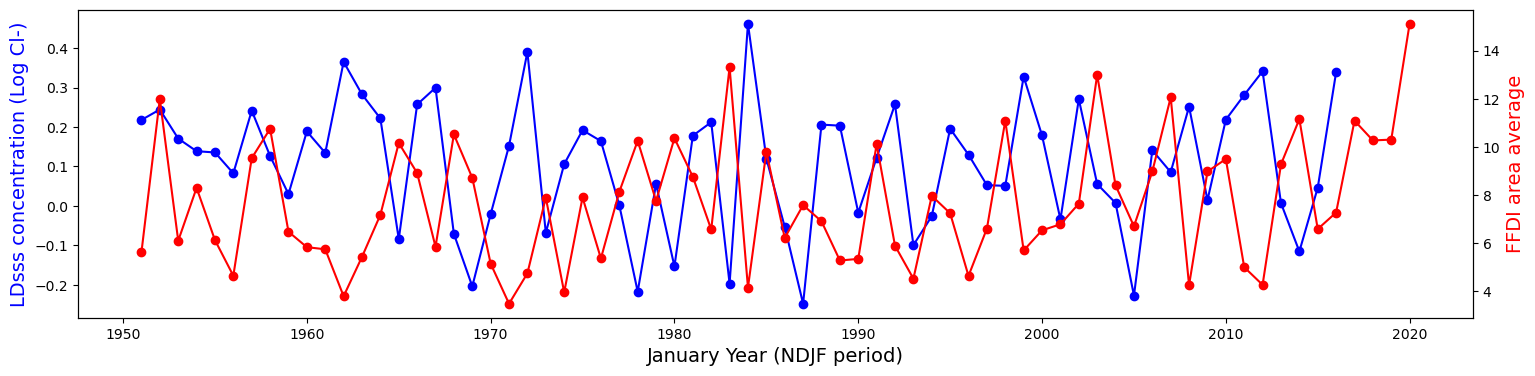

In [10]:
dates = df['JanYear']
FFDI = df['mean']
LDsss = df['LDsss_DJFM']

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (18,4))
# make a plot

ax.plot(dates,
        LDsss,
        color="blue", 
        marker="o")
# set x-axis label
ax.set_xlabel("January Year (NDJF period)", fontsize = 14)
# set y-axis label
ax.set_ylabel("LDsss concentration (Log Cl-)",
              color="blue",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dates, FFDI,color="red",marker="o")
ax2.set_ylabel("FFDI area average",color="red",fontsize=14)

plt.savefig('/g/data/v45/du2523/Fire_paper_scripts_figures/LDsss_FFDI_SthESB_Hunter_LakesEntrance_plus_ACT_VicAlps_area_average.jpg')
plt.savefig('/g/data/v45/du2523/Fire_paper_scripts_figures/LDsss_FFDI_SthESB_Hunter_LakesEntrance_plus_ACT_VicAlps_area_average.pdf')
plt.show()


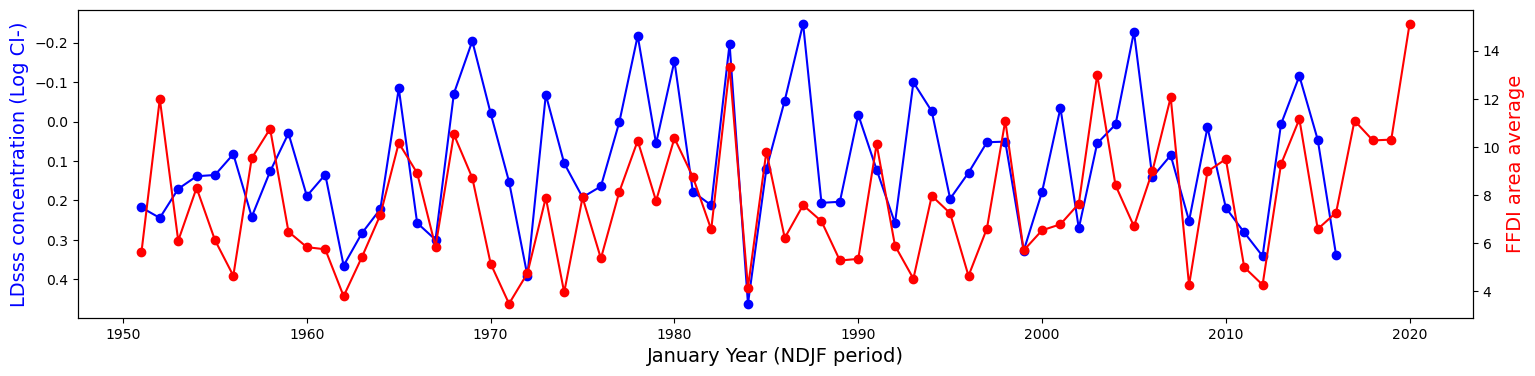

In [12]:
#inverted y axis - use this plot in figure - FIGURE 1d

dates = df['JanYear']
FFDI = df['mean']
LDsss = df['LDsss_DJFM']

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (18,4))
# make a plot

ax.plot(dates,
        LDsss,
        color="blue", 
        marker="o")
ax.invert_yaxis()
# set x-axis label
ax.set_xlabel("January Year (NDJF period)", fontsize = 14)
# set y-axis label
ax.set_ylabel("LDsss concentration (Log Cl-)",
              color="blue",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dates, FFDI,color="red",marker="o")
ax2.set_ylabel("FFDI area average",color="red",fontsize=14)


plt.savefig('/g/data/v45/du2523/Fire_paper_scripts_figures/LDsss_FFDI_SthESB_Hunter_LakesEntrance_plus_ACT_VicAlps_area_average_mean_LDsss_inverted.jpg')
plt.savefig('/g/data/v45/du2523/Fire_paper_scripts_figures/LDsss_FFDI_SthESB_Hunter_LakesEntrance_plus_ACT_VicAlps_area_average_mean_LDsss_inverted.pdf')
plt.show()
